In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in Donor Information

In [2]:
donor_info = pd.read_excel("data/Donor Metadata/sea-ad_cohort_donor_metadata_082222.xlsx")
donor_info

,Donor ID,Primary Study Name,Secondary Study Name,Age at Death,Sex,Race (choice=White),Race (choice=Black/ African American),Race (choice=Asian),Race (choice=American Indian/ Alaska Native),Race (choice=Native Hawaiian or Pacific Islander),...,Braak,CERAD score,Overall CAA Score,Highest Lewy Body Disease,Total Microinfarcts (not observed grossly),Total microinfarcts in screening sections,Atherosclerosis,Arteriolosclerosis,LATE,RIN
0,H19.33.004,ACT,NaN,80,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Braak IV,Absent,Not identified,Not Identified (olfactory bulb not assessed),1,1,Mild,Moderate,Not Identified,8.33
1,H20.33.001,ACT,NaN,82,Male,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Braak IV,Sparse,Not identified,Not Identified (olfactory bulb not assessed),0,0,Mild,Mild,LATE Stage 2,8.60
2,H20.33.002,ACT,NaN,90+,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Braak IV,Absent,Not identified,Limbic (Transitional),0,0,Moderate,Moderate,LATE Stage 2,7.87
3,H20.33.004,ACT,NaN,86,Male,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Braak V,Frequent,Moderate,Neocortical (Diffuse),0,0,Mild,Severe,LATE Stage 1,7.83
4,H20.33.005,ACT,NaN,90+,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Braak IV,Moderate,Moderate,Not Identified (olfactory bulb not assessed),2,2,Mild,Moderate,LATE Stage 1,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21.33.043,ACT,NaN,90+,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Braak II,Sparse,Not identified,Not Identified (olfactory bulb assessed),1,0,Moderate,Moderate,LATE Stage 1,7.27
80,H21.33.044,ACT,NaN,88,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Braak VI,Frequent,Moderate,Not Identified (olfactory bulb not assessed),9,9,Mild,Severe,LATE Stage 1,8.63
81,H21.33.045,ADRC Clinical Core,NaN,90+,Female,Unchecked,Unchecked,Checked,Unchecked,Unchecked,...,Braak VI,Frequent,Moderate,Limbic (Transitional),0,0,Moderate,Moderate,LATE Stage 3,6.55
82,H21.33.046,ACT,NaN,90+,Male,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Braak V,Moderate,Moderate,Neocortical (Diffuse),0,0,Mild,Severe,LATE Stage 2,7.28


In [3]:
donor_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 65 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Donor ID                                                                      84 non-null     object 
 1   Primary Study Name                                                            84 non-null     object 
 2   Secondary Study Name                                                          6 non-null      object 
 3   Age at Death                                                                  84 non-null     object 
 4   Sex                                                                           84 non-null     object 
 5   Race (choice=White)                                                           84 non-null     object 
 6   Race (choice=Black/ African American

In [4]:
donor_info.isna().sum()

Donor ID                                      0
Primary Study Name                            0
Secondary Study Name                         78
Age at Death                                  0
Sex                                           0
                                             ..
Total microinfarcts in screening sections     0
Atherosclerosis                               0
Arteriolosclerosis                            0
LATE                                          0
RIN                                           0
Length: 65, dtype: int64

In [5]:
donor_info.isnull().sum() * 100 / len(donor_info)

Donor ID                                      0.000000
Primary Study Name                            0.000000
Secondary Study Name                         92.857143
Age at Death                                  0.000000
Sex                                           0.000000
                                               ...    
Total microinfarcts in screening sections     0.000000
Atherosclerosis                               0.000000
Arteriolosclerosis                            0.000000
LATE                                          0.000000
RIN                                           0.000000
Length: 65, dtype: float64

In [6]:
donor_info["Primary Study Name"].value_counts()

ACT                   69
ADRC Clinical Core    15
Name: Primary Study Name, dtype: int64

In [7]:
donor_info["Secondary Study Name"].value_counts()

ADRC Clinical Core    4
SLS                   2
Name: Secondary Study Name, dtype: int64

In [8]:
donor_info["Age at Death"].isnull().sum()

0

In [9]:
donor_info["Age at Death"].value_counts()

90+    46
88      5
82      4
86      3
89      3
81      3
83      3
80      2
85      2
84      2
75      2
87      2
77      1
70      1
78      1
65      1
69      1
72      1
68      1
Name: Age at Death, dtype: int64

In [10]:
def categorize_age(age):
    if age == '90+':
        return '90+'
    age = int(age)  # Convert the age to integer
    if 65 <= age < 75:
        return '65-74'
    elif 75 <= age < 80:
        return '75-79'
    elif 80 <= age < 85:
        return '80-84'
    else:  # 85 <= age < 90
        return '85-89'

donor_info['Age at Death Cat'] = donor_info['Age at Death'].apply(categorize_age)
age_categories = ['65-74', '75-79', '80-84', '85-89', '90+']
donor_info['Age at Death Cat'] = pd.Categorical(donor_info['Age at Death Cat'], categories=age_categories, ordered=True)

In [11]:
donor_info["Age at Death Cat"].value_counts()

90+      46
85-89    15
80-84    14
65-74     5
75-79     4
Name: Age at Death Cat, dtype: int64

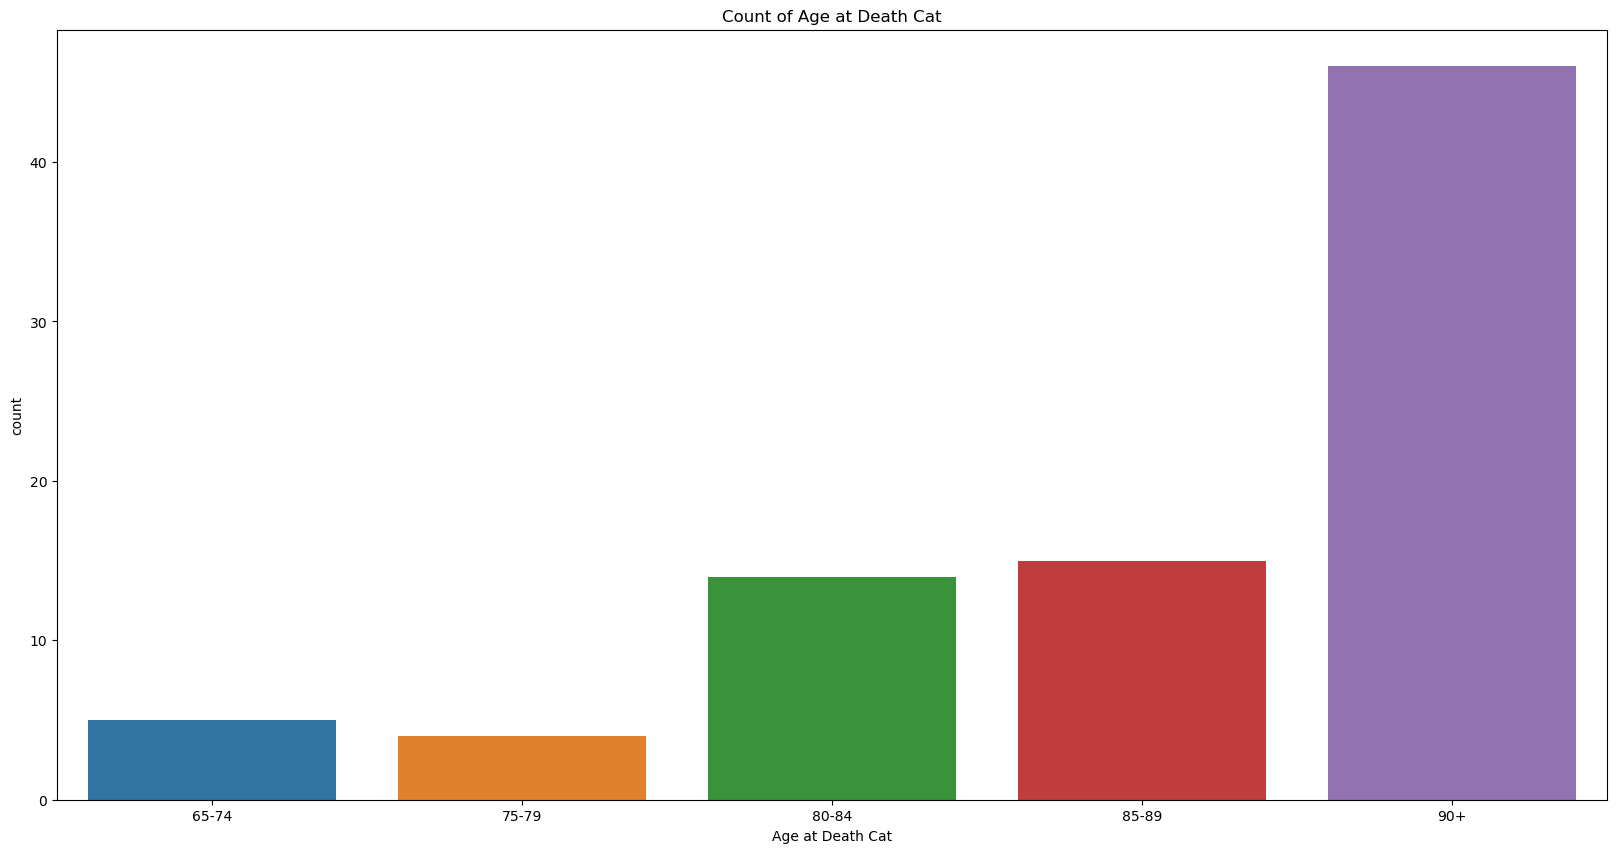

In [12]:
plt.figure(figsize=(20, 10)) 
sns.countplot(x='Age at Death Cat', data=donor_info)
plt.title('Count of Age at Death Cat')
plt.show()

In [13]:
donor_info["Sex"].value_counts()

Female    51
Male      33
Name: Sex, dtype: int64

In [14]:
donor_info["Race (choice=White)"].value_counts()

Checked      81
Unchecked     3
Name: Race (choice=White), dtype: int64

In [15]:
donor_info["Race (choice=Black/ African American)"].value_counts()

Unchecked    84
Name: Race (choice=Black/ African American), dtype: int64

In [16]:
donor_info["Race (choice=Asian)"].value_counts()

Unchecked    81
Checked       3
Name: Race (choice=Asian), dtype: int64

In [17]:
donor_info["Race (choice=American Indian/ Alaska Native)"].value_counts()

Unchecked    83
Checked       1
Name: Race (choice=American Indian/ Alaska Native), dtype: int64

In [18]:
donor_info["Race (choice=Native Hawaiian or Pacific Islander)"].value_counts()

Unchecked    84
Name: Race (choice=Native Hawaiian or Pacific Islander), dtype: int64

In [19]:
donor_info["Race (choice=Unknown or unreported)"].value_counts()

Unchecked    84
Name: Race (choice=Unknown or unreported), dtype: int64

In [20]:
donor_info["Race (choice=Unknown or unreported)"].value_counts()

Unchecked    84
Name: Race (choice=Unknown or unreported), dtype: int64

In [21]:
donor_info["Race (choice=Other)"].value_counts()

Unchecked    81
Checked       3
Name: Race (choice=Other), dtype: int64

In [22]:
donor_info["specify other race"].value_counts()

Mixed    3
Name: specify other race, dtype: int64

In [23]:
donor_info["Hispanic/Latino"].value_counts()

No         82
Yes         1
Unknown     1
Name: Hispanic/Latino, dtype: int64

In [24]:
donor_info["Highest level of education"].value_counts()
edu_categories = ['High School', 'Trade School/ Tech School', 'Bachelors', 'Professional', 'Graduate (PhD/Masters)']
donor_info['Highest level of education'] = pd.Categorical(donor_info['Highest level of education'], categories=edu_categories, ordered=True)

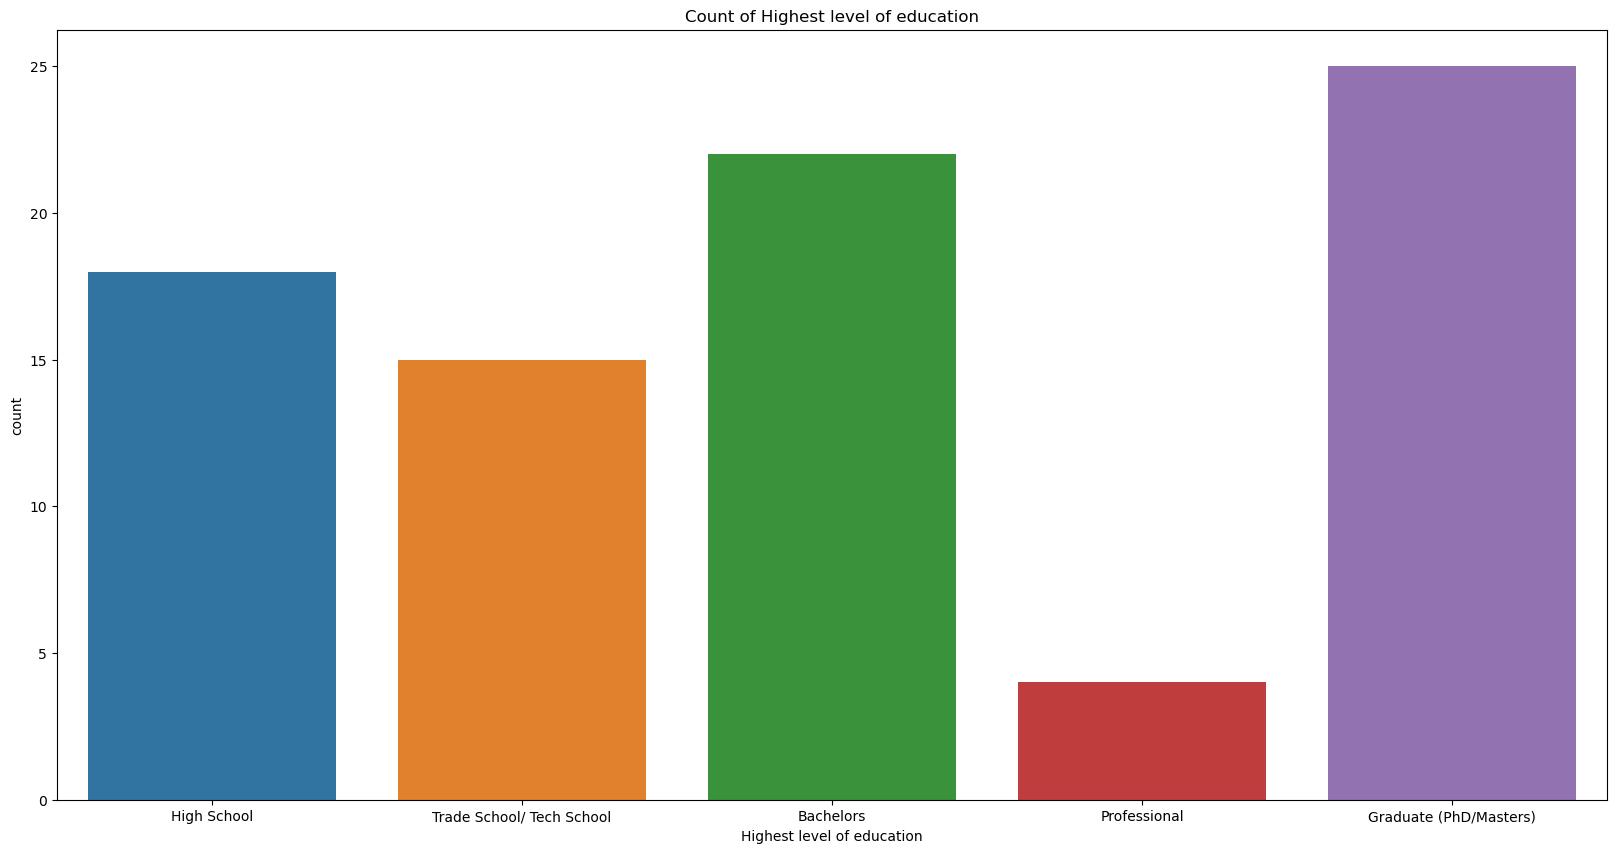

In [25]:
plt.figure(figsize=(20, 10)) 
sns.countplot(x='Highest level of education', data=donor_info)
plt.title('Count of Highest level of education')
plt.show()

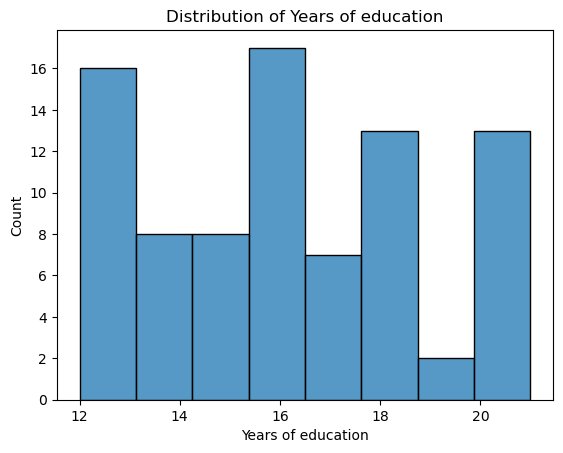

In [26]:
sns.histplot(donor_info['Years of education'])
plt.title('Distribution of Years of education')
plt.show()

In [27]:
donor_info["APOE4 Status"].value_counts()

N    59
Y    25
Name: APOE4 Status, dtype: int64

In [28]:
donor_info["Cognitive Status"].value_counts()

No dementia    42
Dementia       42
Name: Cognitive Status, dtype: int64

In [29]:
donor_info["Age of onset cognitive symptoms"].isnull().sum()

46

In [30]:
donor_info["Age of onset cognitive symptoms"].value_counts()
#donor_info['Age of onset cognitive symptoms Cat'] = donor_info['Age of onset cognitive symptoms'].apply(categorize_age)

90+    8
88     5
84     3
64     3
82     3
80     2
87     2
89     1
72     1
79     1
86     1
53     1
85     1
61     1
63     1
54     1
71     1
83     1
78     1
Name: Age of onset cognitive symptoms, dtype: int64

In [31]:
donor_info["Age of Dementia diagnosis"].isnull().sum()

48

In [32]:
donor_info["Age of Dementia diagnosis"].value_counts()

90+    11
84      4
89      4
86      4
81      2
65      2
78      2
83      2
67      1
74      1
60      1
53      1
88      1
Name: Age of Dementia diagnosis, dtype: int64

In [33]:
donor_info["Known head injury"].value_counts()

No     17
Yes    10
Name: Known head injury, dtype: int64

In [34]:
donor_info["Have they had neuroimaging"].value_counts()

Yes        40
Unknown    38
No          6
Name: Have they had neuroimaging, dtype: int64

In [35]:
donor_info["Consensus Clinical Dx (choice=Alzheimers disease)"].value_counts()

Unchecked    61
Checked      23
Name: Consensus Clinical Dx (choice=Alzheimers disease), dtype: int64

In [36]:
donor_info["Consensus Clinical Dx (choice=Alzheimers Possible/ Probable)"].value_counts()

Unchecked    75
Checked       9
Name: Consensus Clinical Dx (choice=Alzheimers Possible/ Probable), dtype: int64

In [37]:
donor_info["Consensus Clinical Dx (choice=Ataxia)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Ataxia), dtype: int64

In [38]:
donor_info["Consensus Clinical Dx (choice=Corticobasal Degeneration)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Corticobasal Degeneration), dtype: int64

In [39]:
donor_info["Consensus Clinical Dx (choice=Corticobasal Degeneration)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Corticobasal Degeneration), dtype: int64

In [40]:
donor_info["Consensus Clinical Dx (choice=Control)"].value_counts()

Unchecked    52
Checked      32
Name: Consensus Clinical Dx (choice=Control), dtype: int64

In [41]:
donor_info["Consensus Clinical Dx (choice=Dementia with Lewy Bodies/ Lewy Body Disease)"].value_counts()

Unchecked    83
Checked       1
Name: Consensus Clinical Dx (choice=Dementia with Lewy Bodies/ Lewy Body Disease), dtype: int64

In [42]:
donor_info["Consensus Clinical Dx (choice=Frontotemporal lobar degeneration)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Frontotemporal lobar degeneration), dtype: int64

In [43]:
donor_info["Consensus Clinical Dx (choice=Huntingtons disease)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Huntingtons disease), dtype: int64

In [44]:
donor_info["Consensus Clinical Dx (choice=Motor Neuron disease)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Motor Neuron disease), dtype: int64

In [45]:
donor_info["Consensus Clinical Dx (choice=Multiple System Atrophy)"].value_counts()

Unchecked    83
Checked       1
Name: Consensus Clinical Dx (choice=Multiple System Atrophy), dtype: int64

In [46]:
donor_info["Consensus Clinical Dx (choice=Parkinsons disease)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Parkinsons disease), dtype: int64

In [58]:
donor_info["Consensus Clinical Dx (choice=Parkinsons Cognitive Impairment - no dementia)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Parkinsons Cognitive Impairment - no dementia), dtype: int64

In [59]:
donor_info["Consensus Clinical Dx (choice=Progressive Supranuclear Palsy)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Progressive Supranuclear Palsy), dtype: int64

In [60]:
donor_info["Consensus Clinical Dx (choice=Prion)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Prion), dtype: int64

In [61]:
donor_info["Consensus Clinical Dx (choice=Taupathy)"].value_counts()

Unchecked    84
Name: Consensus Clinical Dx (choice=Taupathy), dtype: int64

In [62]:
donor_info["Consensus Clinical Dx (choice=Vascular Dementia)"].value_counts()

Unchecked    83
Checked       1
Name: Consensus Clinical Dx (choice=Vascular Dementia), dtype: int64

In [63]:
donor_info["Consensus Clinical Dx (choice=Unknown)"].value_counts()

Unchecked    72
Checked      12
Name: Consensus Clinical Dx (choice=Unknown), dtype: int64

In [64]:
donor_info["Consensus Clinical Dx (choice=Other)"].value_counts()

Unchecked    71
Checked      13
Name: Consensus Clinical Dx (choice=Other), dtype: int64

In [65]:
donor_info["If other Consensus dx, describe"].value_counts()

dementia due to multiple etiologies                                         2
late onset AD                                                               1
EOAD                                                                        1
MCI multidomain (amnestic, language, attention, executive, visuospatial)    1
Note in 2018 OPCA vs MSA?                                                   1
brain mets                                                                  1
Declining cognitive abilities                                               1
dementia related to subdural, has Parkinsonian features                     1
Name: If other Consensus dx, describe, dtype: int64

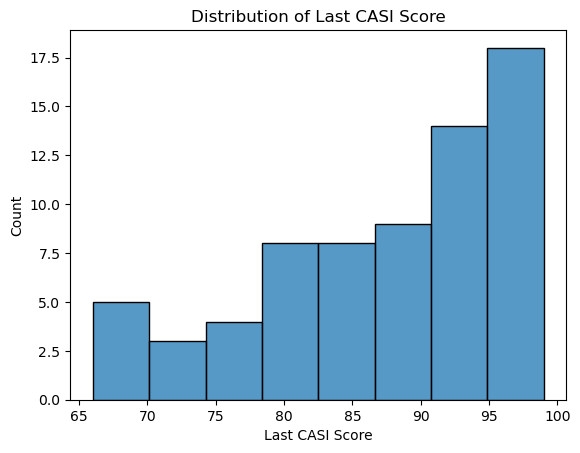

In [66]:
sns.histplot(donor_info['Last CASI Score'])
plt.title('Distribution of Last CASI Score')
plt.show()

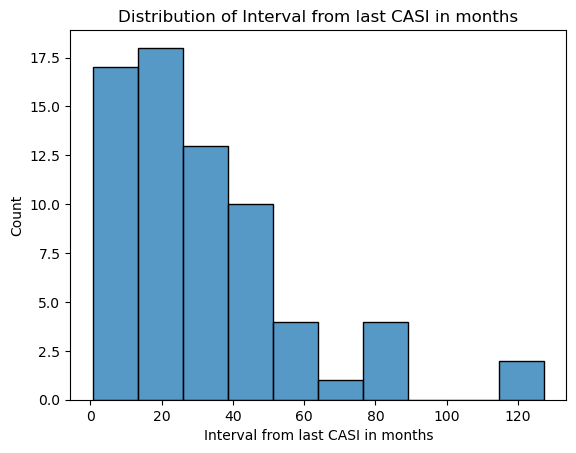

In [67]:
sns.histplot(donor_info['Interval from last CASI in months'])
plt.title('Distribution of Interval from last CASI in months')
plt.show()

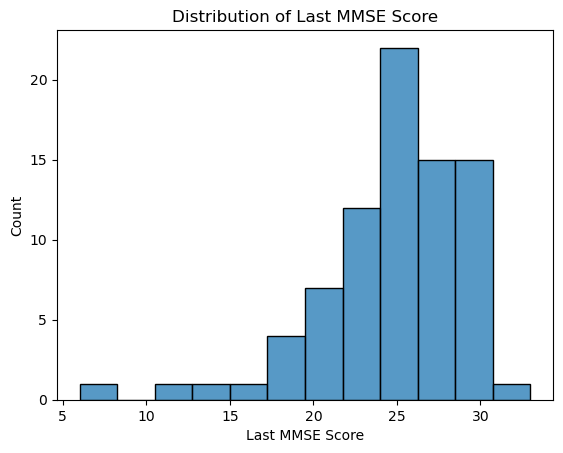

In [68]:
sns.histplot(donor_info['Last MMSE Score'])
plt.title('Distribution of Last MMSE Score')
plt.show()

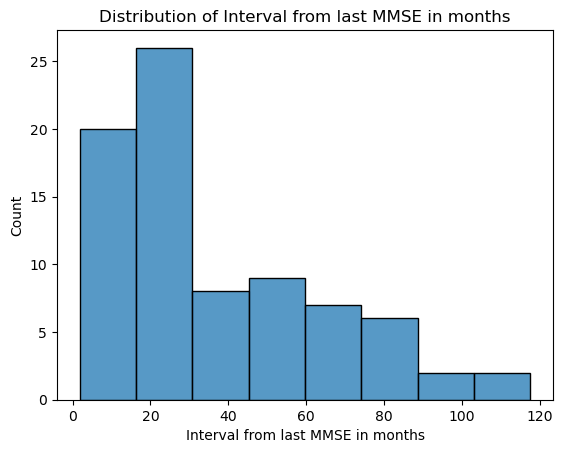

In [71]:
sns.histplot(donor_info['Interval from last MMSE in months'])
plt.title('Distribution of Interval from last MMSE in months')
plt.show()

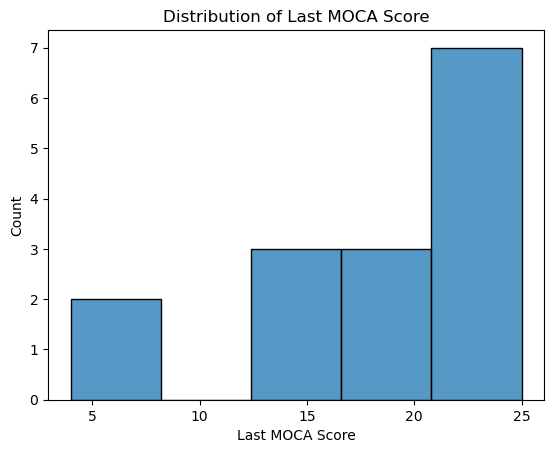

In [73]:
sns.histplot(donor_info['Last MOCA Score'])
plt.title('Distribution of Last MOCA Score')
plt.show()

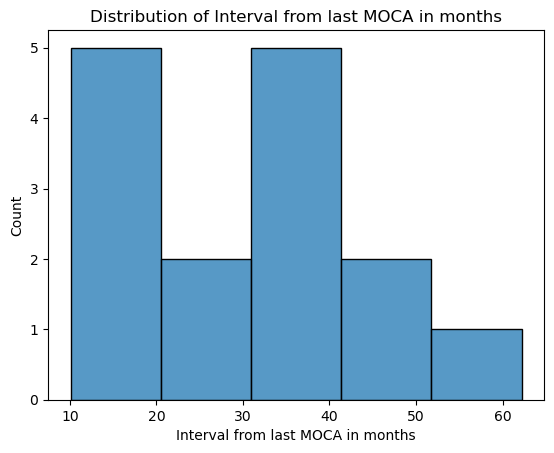

In [72]:
sns.histplot(donor_info['Interval from last MOCA in months'])
plt.title('Distribution of Interval from last MOCA in months')
plt.show()

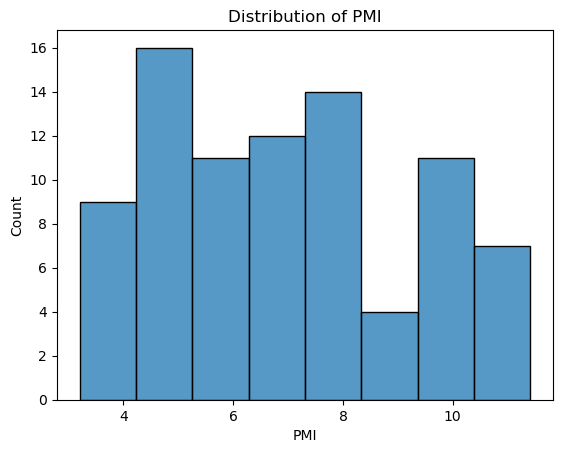

In [74]:
sns.histplot(donor_info['PMI'])
plt.title('Distribution of PMI')
plt.show()

In [75]:
donor_info["Rapid Frozen Tissue Type"].value_counts()

Precision Slices    84
Name: Rapid Frozen Tissue Type, dtype: int64

In [76]:
donor_info["Ex Vivo Imaging"].value_counts()

Yes    82
No      2
Name: Ex Vivo Imaging, dtype: int64

In [77]:
donor_info["Fresh Brain Weight"].value_counts()

1031    3
1035    2
1110    2
1280    2
1165    2
       ..
1172    1
1030    1
1321    1
1338    1
1159    1
Name: Fresh Brain Weight, Length: 74, dtype: int64

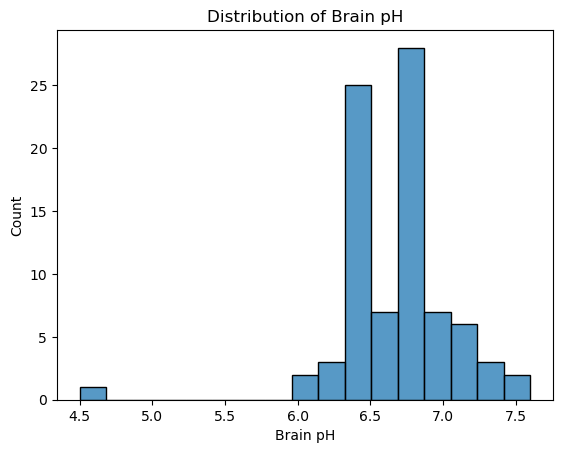

In [79]:
sns.histplot(donor_info['Brain pH'])
plt.title('Distribution of Brain pH')
plt.show()

In [80]:
donor_info["Overall AD neuropathological Change"].value_counts()

High            42
Intermediate    21
Low             12
Not AD           9
Name: Overall AD neuropathological Change, dtype: int64

In [81]:
donor_info["Thal"].value_counts()

Thal 4    30
Thal 5    21
Thal 3    12
Thal 0     9
Thal 2     7
Thal 1     5
Name: Thal, dtype: int64

In [82]:
donor_info["Braak"].value_counts()

Braak V      34
Braak IV     23
Braak VI     15
Braak III     6
Braak II      4
Braak 0       2
Name: Braak, dtype: int64

In [83]:
donor_info["CERAD score"].value_counts()

Frequent    30
Moderate    26
Absent      16
Sparse      12
Name: CERAD score, dtype: int64

In [84]:
donor_info["Overall CAA Score"].value_counts()

Moderate          36
Not identified    33
Mild              13
Severe             2
Name: Overall CAA Score, dtype: int64

In [85]:
donor_info["Highest Lewy Body Disease"].value_counts()

Not Identified (olfactory bulb not assessed)    39
Neocortical (Diffuse)                           14
Amygdala-predominant                            10
Limbic (Transitional)                            9
Not Identified (olfactory bulb assessed)         8
Olfactory bulb only                              2
Brainstem-predominant                            2
Name: Highest Lewy Body Disease, dtype: int64

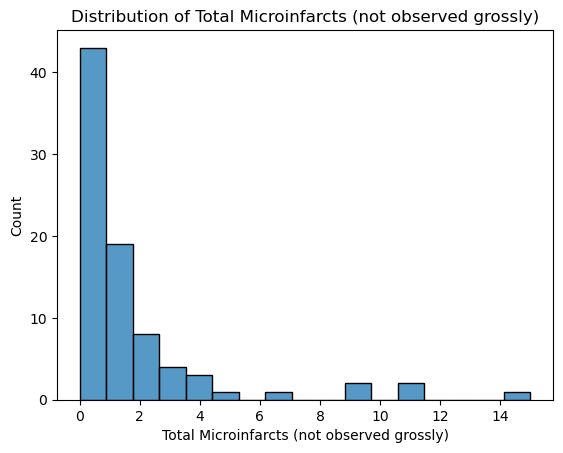

In [86]:
sns.histplot(donor_info['Total Microinfarcts (not observed grossly)'])
plt.title('Distribution of Total Microinfarcts (not observed grossly)')
plt.show()

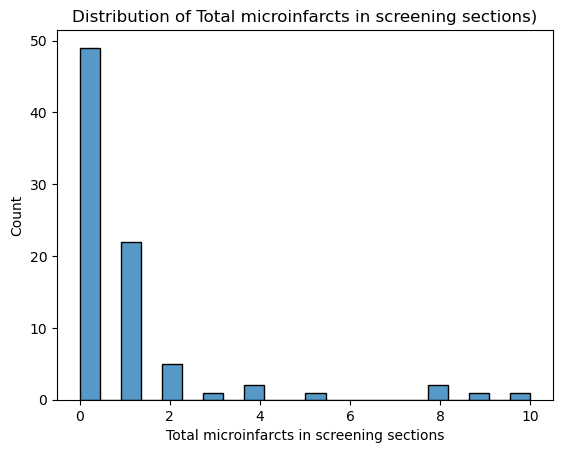

In [87]:
sns.histplot(donor_info['Total microinfarcts in screening sections'])
plt.title('Distribution of Total microinfarcts in screening sections)')
plt.show()

In [88]:
donor_info["Atherosclerosis"].value_counts()

Moderate    51
Mild        22
None         7
Severe       4
Name: Atherosclerosis, dtype: int64

In [89]:
donor_info["Arteriolosclerosis"].value_counts()

Moderate    33
Mild        31
Severe      20
Name: Arteriolosclerosis, dtype: int64

In [90]:
donor_info["LATE"].value_counts()

LATE Stage 2      36
Not Identified    27
LATE Stage 1      15
LATE Stage 3       5
Unclassifiable     1
Name: LATE, dtype: int64

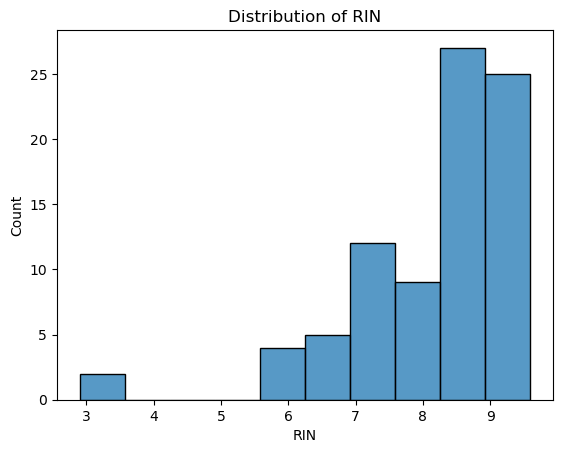

In [92]:
sns.histplot(donor_info['RIN'])
plt.title('Distribution of RIN')
plt.show()

### Choosing Features from Donor Information For Further Analysis

In [62]:
kept_features = ['Donor ID', 'Age at Death Cat', 'Sex', 'Highest level of education', 'APOE4 Status', 'Cognitive Status', 
                 'Brain pH', 'Fresh Brain Weight', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 
                 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 
                 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 
                 'Overall AD neuropathological Change']
donor_info_mod = donor_info[kept_features]
donor_info_mod

,Donor ID,Age at Death Cat,Sex,Highest level of education,APOE4 Status,Cognitive Status,Brain pH,Fresh Brain Weight,Thal,Braak,CERAD score,Overall CAA Score,Highest Lewy Body Disease,Total Microinfarcts (not observed grossly),Total microinfarcts in screening sections,Atherosclerosis,Arteriolosclerosis,LATE,Overall AD neuropathological Change
0,H19.33.004,80-84,Female,Bachelors,N,No dementia,7.0,1035,Thal 0,Braak IV,Absent,Not identified,Not Identified (olfactory bulb not assessed),1,1,Mild,Moderate,Not Identified,Not AD
1,H20.33.001,80-84,Male,Bachelors,N,No dementia,6.8,1338,Thal 2,Braak IV,Sparse,Not identified,Not Identified (olfactory bulb not assessed),0,0,Mild,Mild,LATE Stage 2,Low
2,H20.33.002,90+,Female,High School,N,No dementia,7.3,1078,Thal 0,Braak IV,Absent,Not identified,Limbic (Transitional),0,0,Moderate,Moderate,LATE Stage 2,Not AD
3,H20.33.004,85-89,Male,Trade School/ Tech School,Y,Dementia,6.7,1261,Thal 5,Braak V,Frequent,Moderate,Neocortical (Diffuse),0,0,Mild,Severe,LATE Stage 1,High
4,H20.33.005,90+,Female,High School,N,No dementia,6.8,1003,Thal 3,Braak IV,Moderate,Moderate,Not Identified (olfactory bulb not assessed),2,2,Mild,Moderate,LATE Stage 1,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21.33.043,90+,Female,Bachelors,N,Dementia,6.6,1082,Thal 4,Braak II,Sparse,Not identified,Not Identified (olfactory bulb assessed),1,0,Moderate,Moderate,LATE Stage 1,Low
80,H21.33.044,85-89,Female,Trade School/ Tech School,N,Dementia,6.6,1168,Thal 3,Braak VI,Frequent,Moderate,Not Identified (olfactory bulb not assessed),9,9,Mild,Severe,LATE Stage 1,Intermediate
81,H21.33.045,90+,Female,High School,Y,Dementia,7.2,925,Thal 4,Braak VI,Frequent,Moderate,Limbic (Transitional),0,0,Moderate,Moderate,LATE Stage 3,High
82,H21.33.046,90+,Male,Professional,N,Dementia,6.4,1159,Thal 4,Braak V,Moderate,Moderate,Neocortical (Diffuse),0,0,Mild,Severe,LATE Stage 2,High


In [103]:
donor_info_mod['Overall AD neuropathological Change'].describe()

count       83
unique       4
top       High
freq        41
Name: Overall AD neuropathological Change, dtype: object

In [104]:
donor_info_mod['Overall AD neuropathological Change'].isnull().sum()

0

In [ ]:
donor_info_mod['Fresh Brain Weight Numeric'] = pd.to_numeric(donor_info_mod['Fresh Brain Weight'], errors='coerce')

non_numeric_rows = donor_info_mod[donor_info_mod['Fresh Brain Weight Numeric'].isna()]

non_numeric_rows

In [64]:
donor_info_mod = donor_info_mod.dropna(subset=['Fresh Brain Weight Numeric'])

In [65]:
donor_info_mod['Highest Lewy Body Disease'].value_counts()

Not Identified (olfactory bulb not assessed)    39
Neocortical (Diffuse)                           14
Limbic (Transitional)                            9
Amygdala-predominant                             9
Not Identified (olfactory bulb assessed)         8
Olfactory bulb only                              2
Brainstem-predominant                            2
Name: Highest Lewy Body Disease, dtype: int64

In [105]:
donor_info_mod

,Donor ID,Age at Death Cat,Sex,Highest level of education,APOE4 Status,Cognitive Status,Brain pH,Fresh Brain Weight,Thal,Braak,CERAD score,Overall CAA Score,Highest Lewy Body Disease,Total Microinfarcts (not observed grossly),Total microinfarcts in screening sections,Atherosclerosis,Arteriolosclerosis,LATE,Overall AD neuropathological Change,Fresh Brain Weight Numeric
0,H19.33.004,80-84,Female,Bachelors,N,No dementia,7.0,1035,Thal 0,Braak IV,Absent,Not identified,Not Identified (olfactory bulb not assessed),1,1,Mild,Moderate,Not Identified,Not AD,1035.0
1,H20.33.001,80-84,Male,Bachelors,N,No dementia,6.8,1338,Thal 2,Braak IV,Sparse,Not identified,Not Identified (olfactory bulb not assessed),0,0,Mild,Mild,LATE Stage 2,Low,1338.0
2,H20.33.002,90+,Female,High School,N,No dementia,7.3,1078,Thal 0,Braak IV,Absent,Not identified,Limbic (Transitional),0,0,Moderate,Moderate,LATE Stage 2,Not AD,1078.0
3,H20.33.004,85-89,Male,Trade School/ Tech School,Y,Dementia,6.7,1261,Thal 5,Braak V,Frequent,Moderate,Neocortical (Diffuse),0,0,Mild,Severe,LATE Stage 1,High,1261.0
4,H20.33.005,90+,Female,High School,N,No dementia,6.8,1003,Thal 3,Braak IV,Moderate,Moderate,Not Identified (olfactory bulb not assessed),2,2,Mild,Moderate,LATE Stage 1,Intermediate,1003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21.33.043,90+,Female,Bachelors,N,Dementia,6.6,1082,Thal 4,Braak II,Sparse,Not identified,Not Identified (olfactory bulb assessed),1,0,Moderate,Moderate,LATE Stage 1,Low,1082.0
80,H21.33.044,85-89,Female,Trade School/ Tech School,N,Dementia,6.6,1168,Thal 3,Braak VI,Frequent,Moderate,Not Identified (olfactory bulb not assessed),9,9,Mild,Severe,LATE Stage 1,Intermediate,1168.0
81,H21.33.045,90+,Female,High School,Y,Dementia,7.2,925,Thal 4,Braak VI,Frequent,Moderate,Limbic (Transitional),0,0,Moderate,Moderate,LATE Stage 3,High,925.0
82,H21.33.046,90+,Male,Professional,N,Dementia,6.4,1159,Thal 4,Braak V,Moderate,Moderate,Neocortical (Diffuse),0,0,Mild,Severe,LATE Stage 2,High,1159.0


### Data Visualization for Donor Info

#### Numerical features

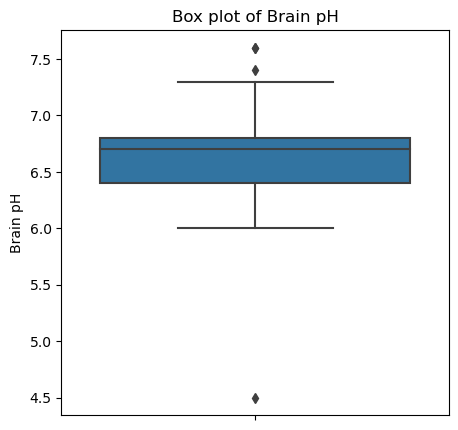

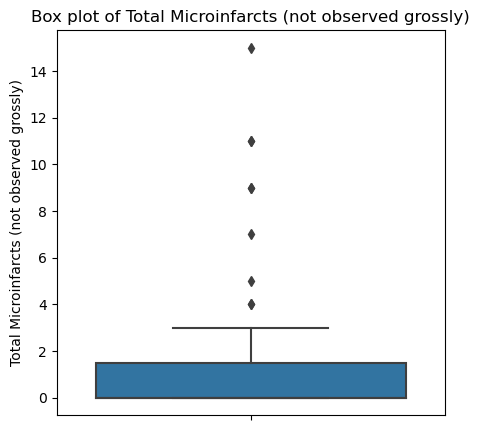

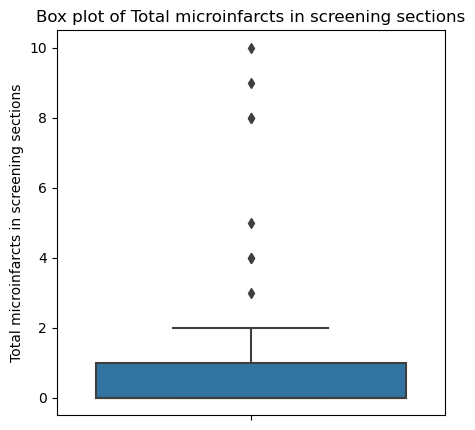

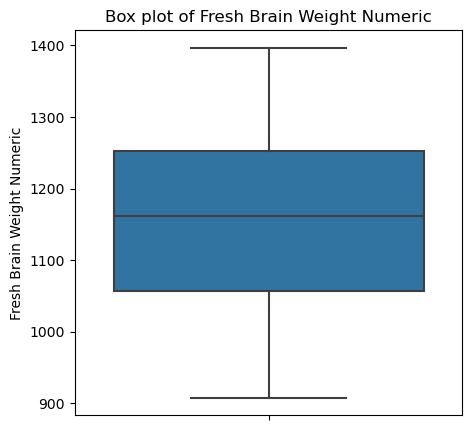

/var/folders/c1/_3m7mbjn7pzcqcl5463xw4mr0000gn/T/ipykernel_13005/3802842592.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = donor_info_mod.corr()


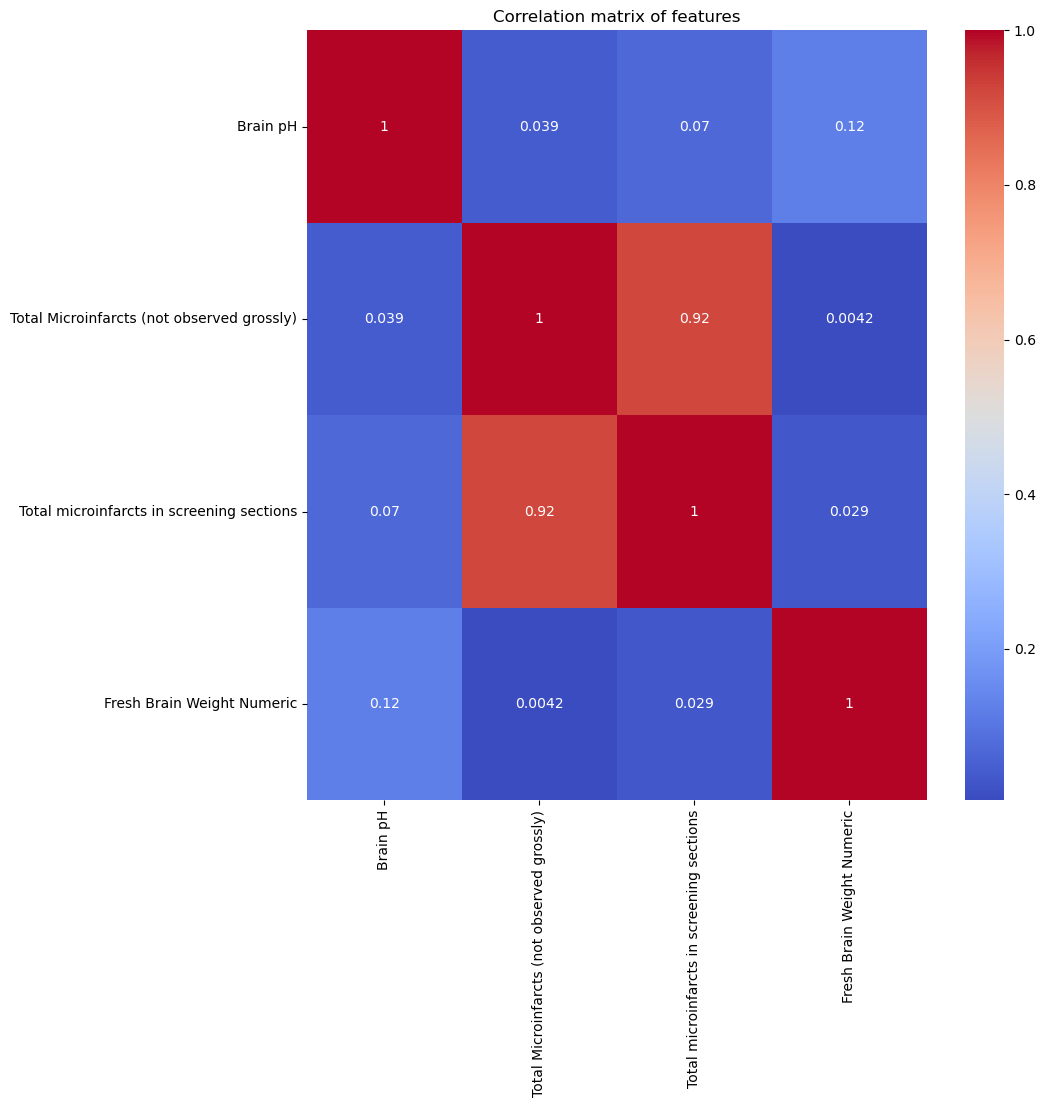

In [114]:
# Box plots for all numerical features
for column in donor_info_mod.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(y=column, data=donor_info_mod)
    plt.title(f"Box plot of {column}")
    plt.show()

# Correlation matrix
correlation_matrix = donor_info_mod.corr()

# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of features")
plt.show()

#### Categorical variables

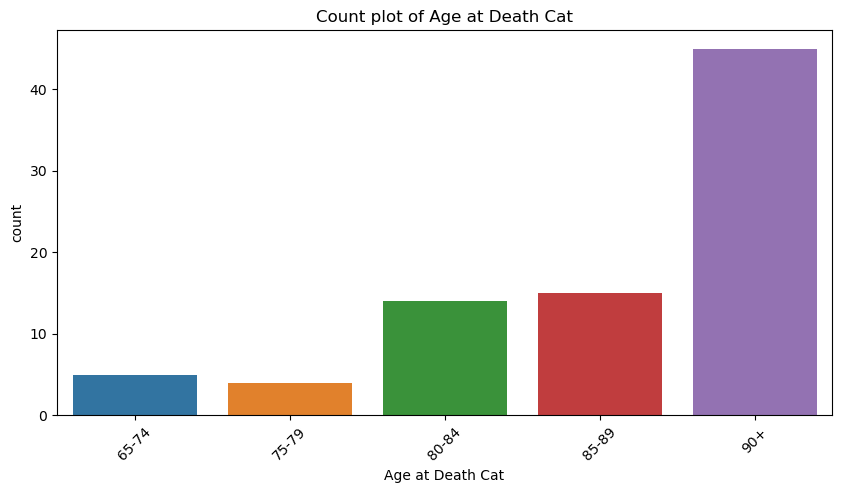

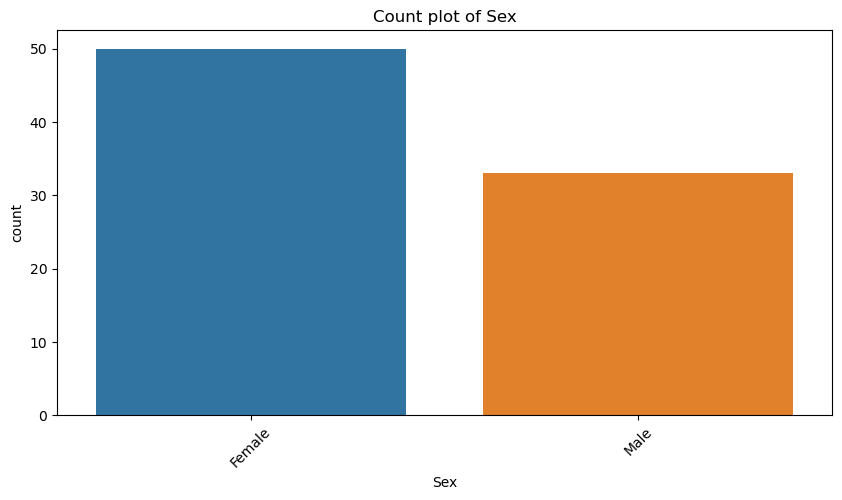

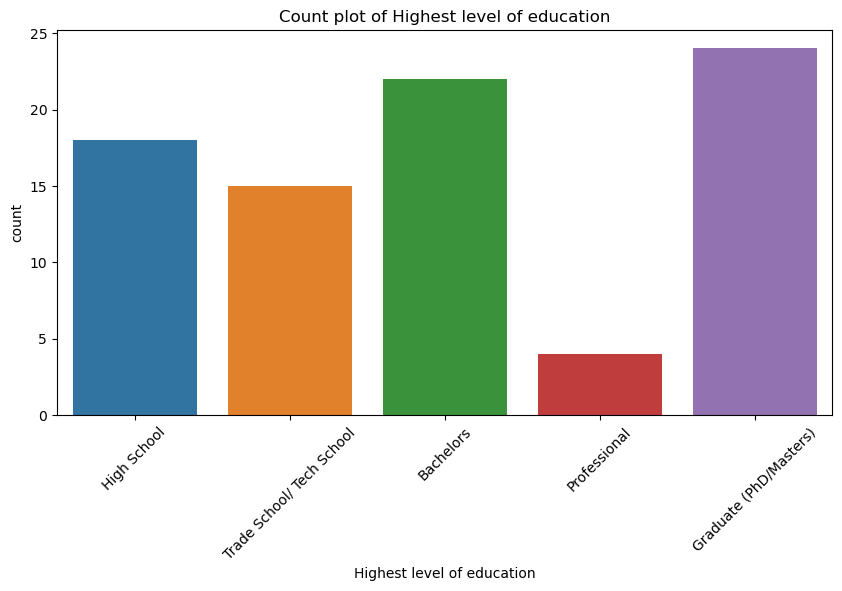

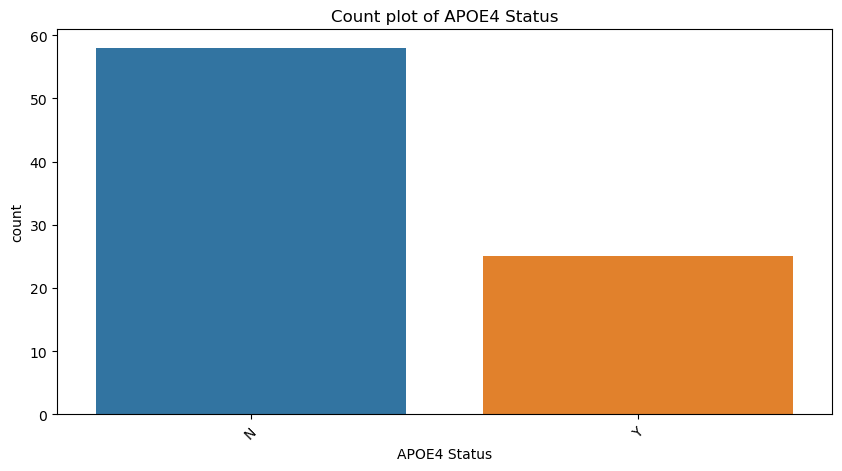

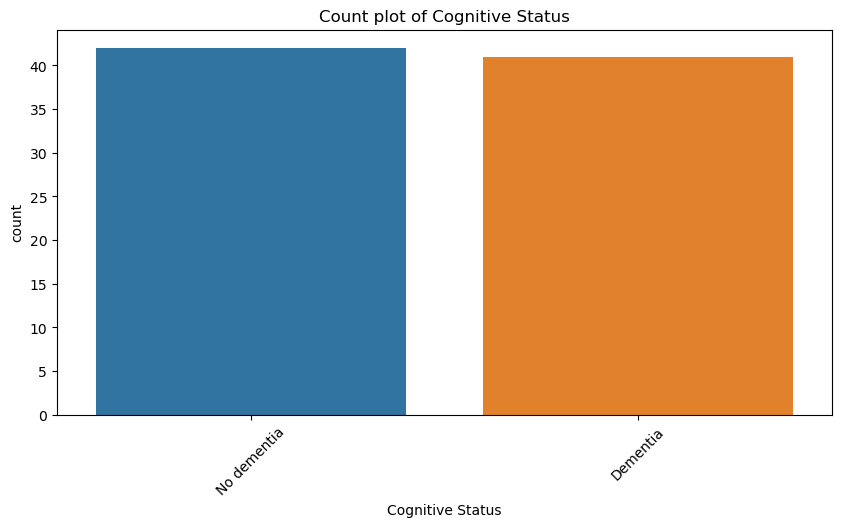

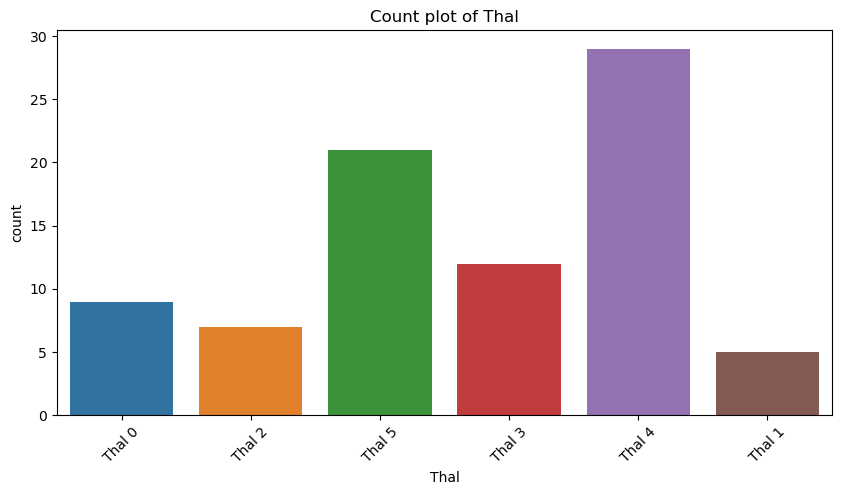

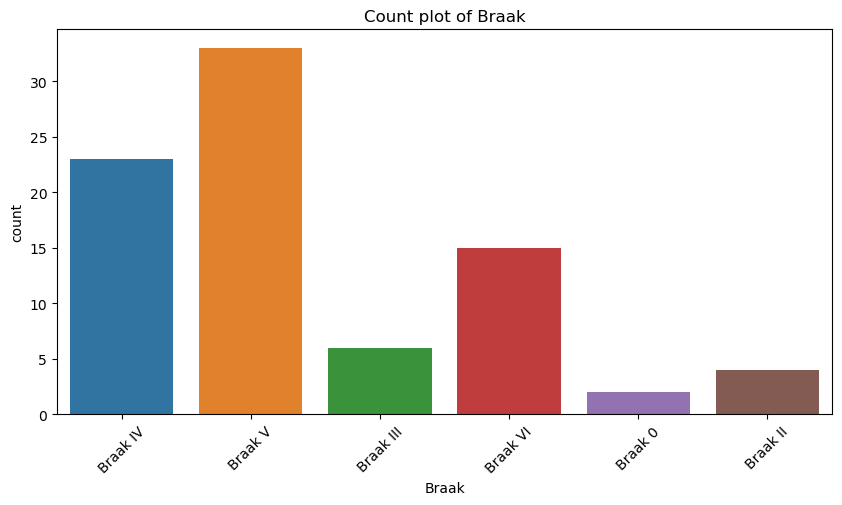

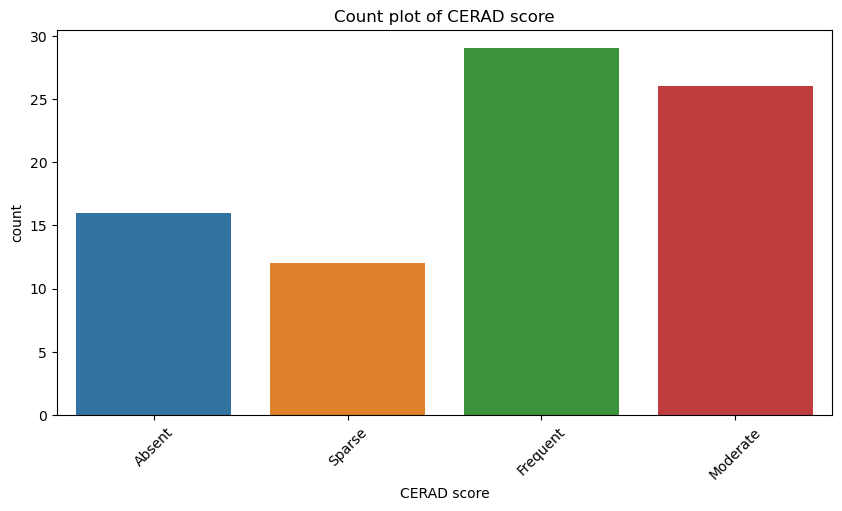

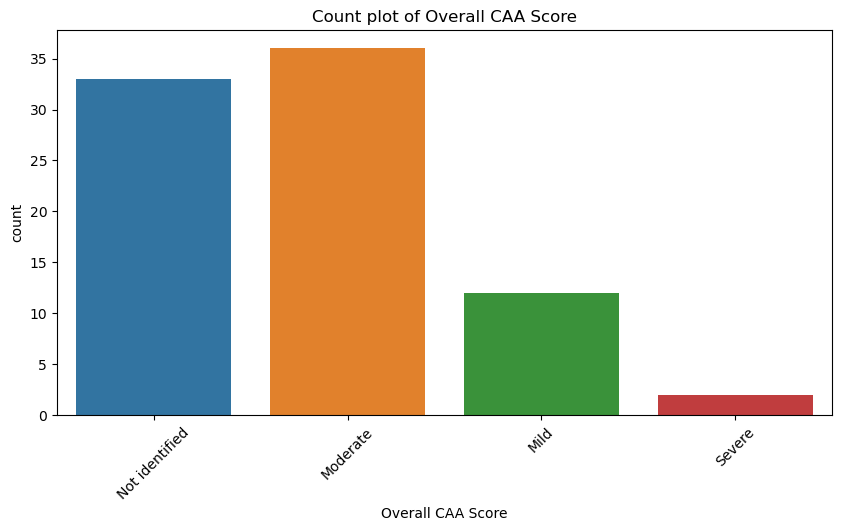

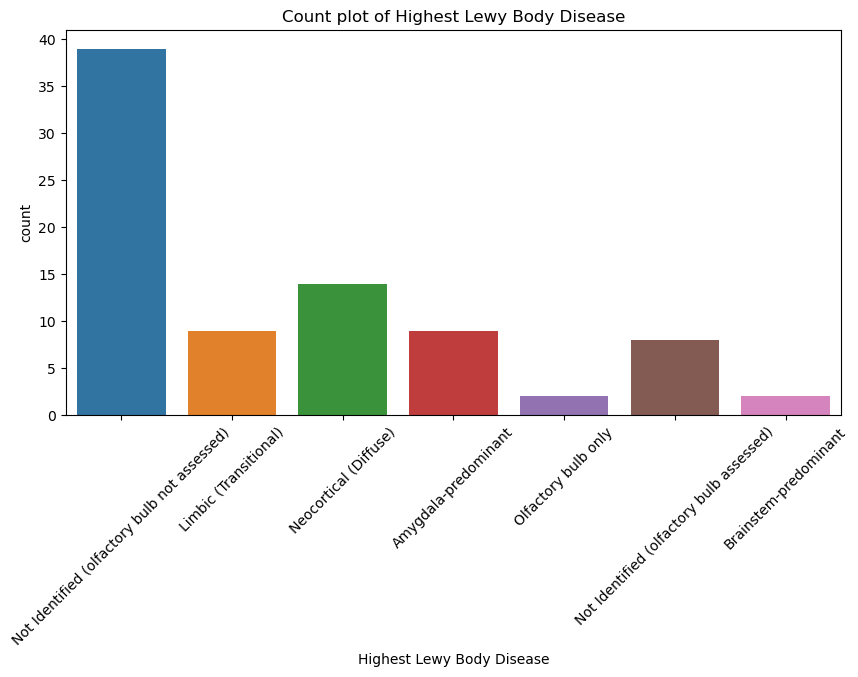

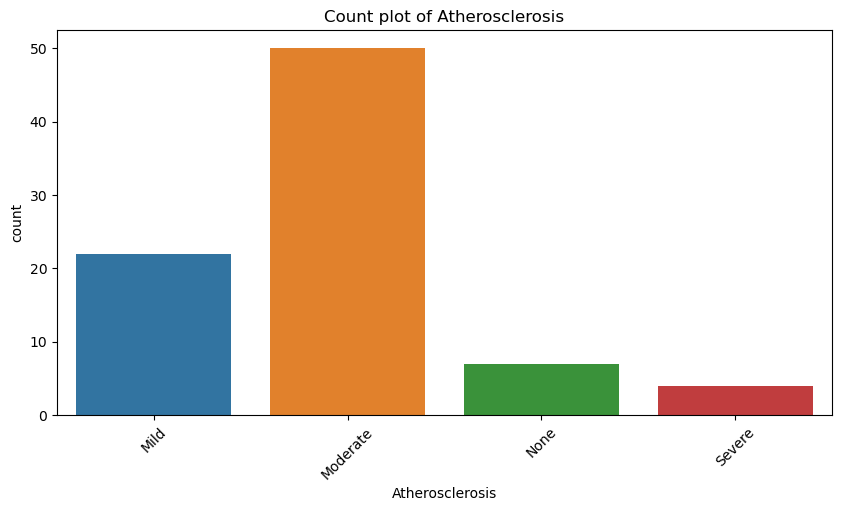

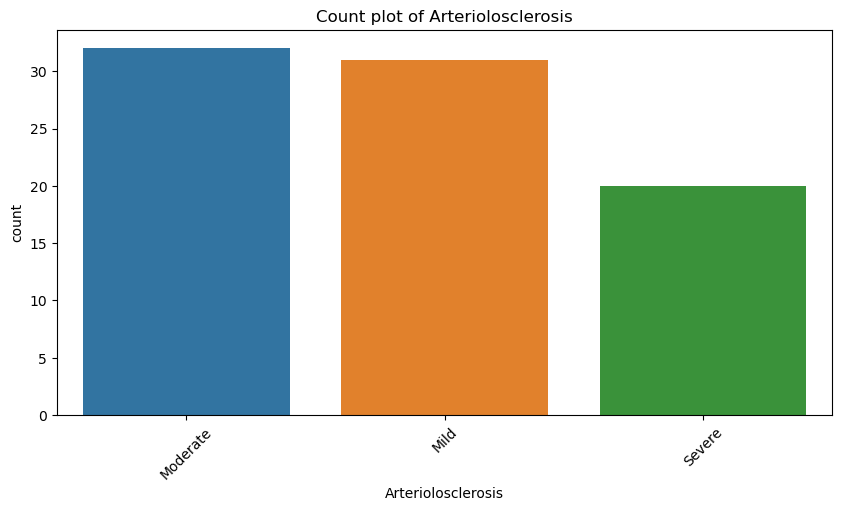

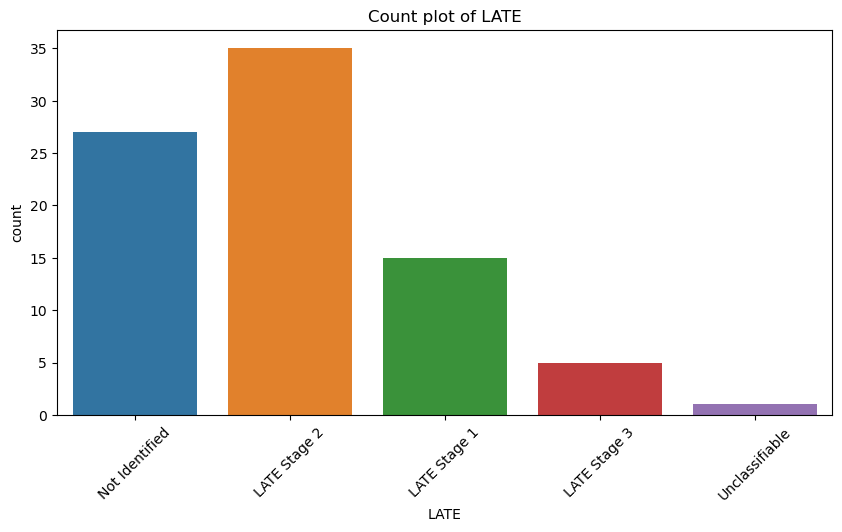

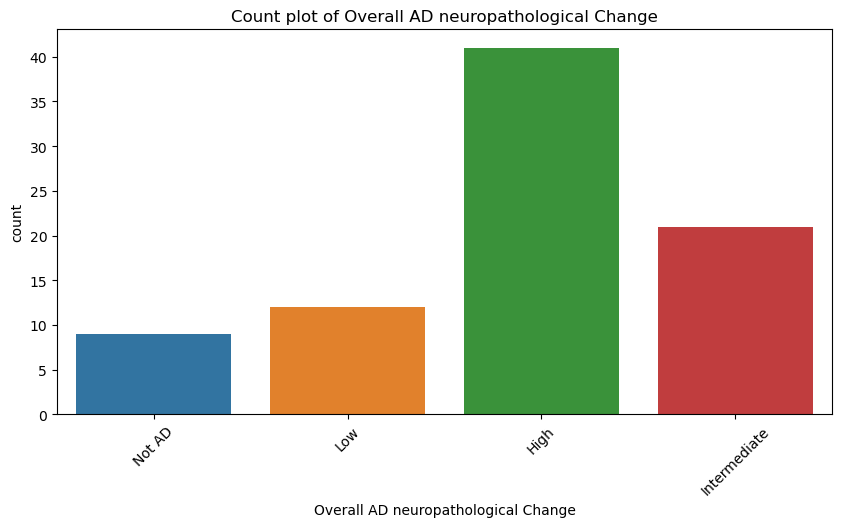

In [111]:
# Bar plots for all categorical features
categorical_features = ['Age at Death Cat', 'Sex', 'Highest level of education', 'APOE4 Status', 'Cognitive Status', 
                 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 
                 'Highest Lewy Body Disease', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 
                 'Overall AD neuropathological Change']

for column in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, data=donor_info_mod)
    plt.title(f"Count plot of {column}")
    plt.xticks(rotation=45)
    plt.show()


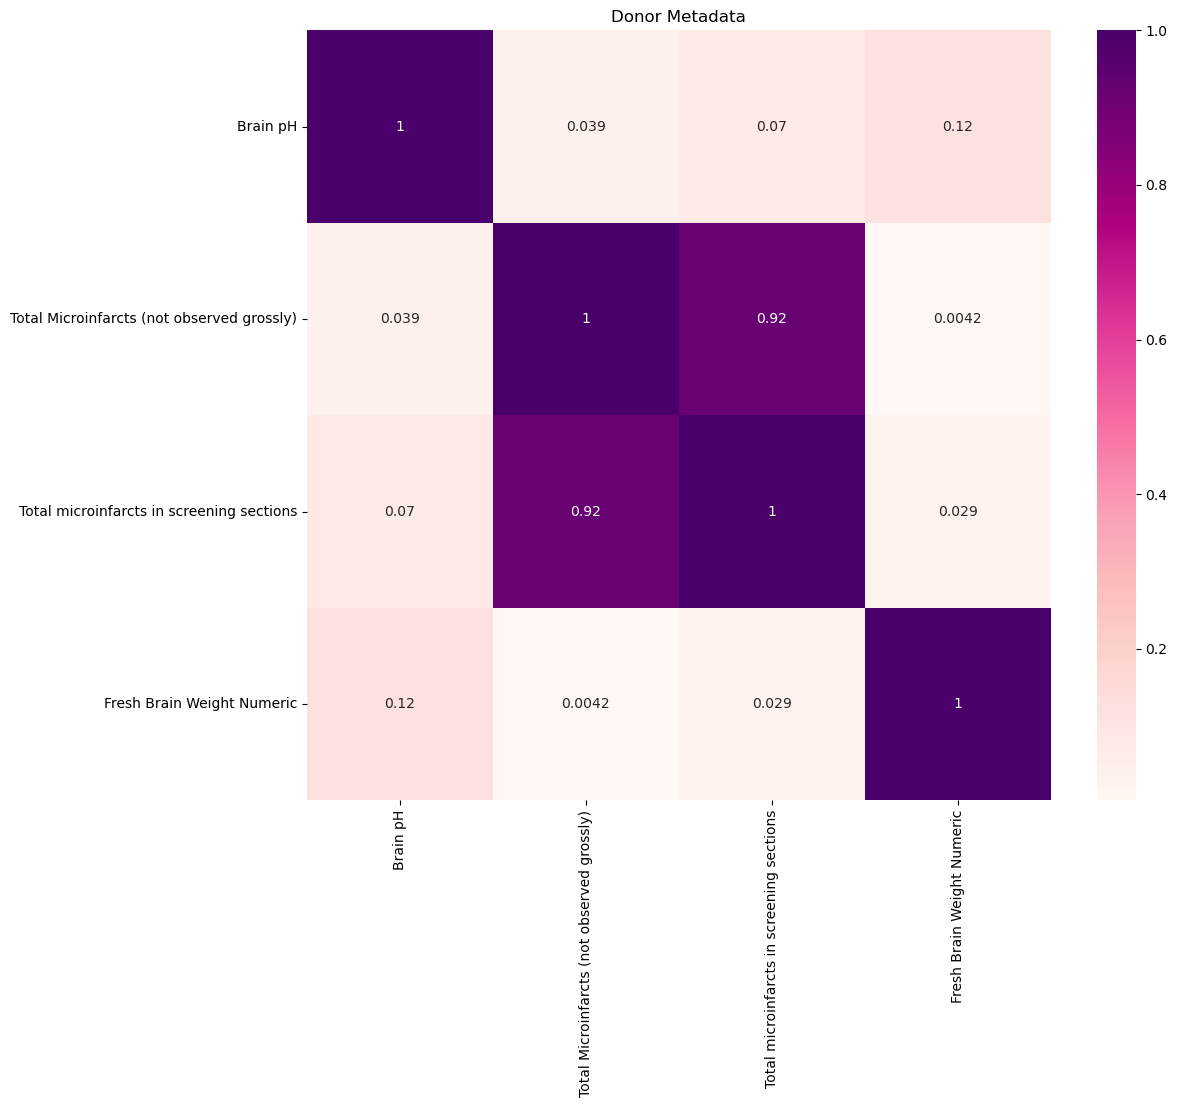

In [66]:
plt.figure(figsize=(12, 10)) 
corr = donor_info_mod.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdPu')
plt.title('Donor Metadata')
plt.show()

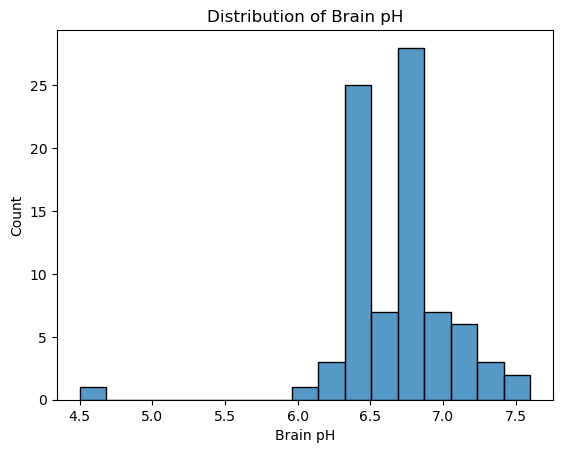

In [152]:
sns.histplot(donor_info_mod['Brain pH'])
plt.title('Distribution of Brain pH')
plt.show()

The skewness could become an issue in the future but lets leave it for now.

In [53]:
from scipy.stats import skew

print('Skewness:', skew(donor_info_mod['Brain pH']))

Skewness: -1.499005173435776


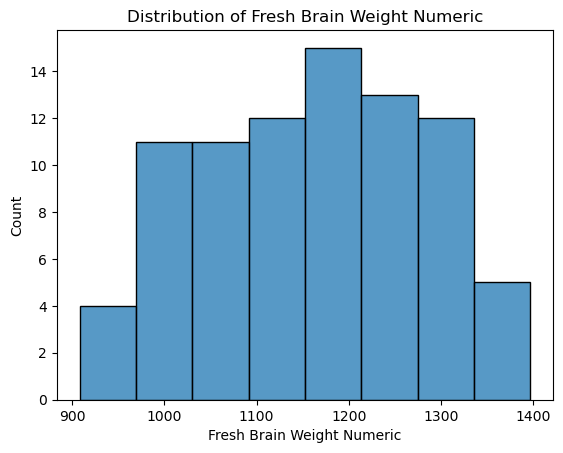

In [54]:
sns.histplot(donor_info_mod['Fresh Brain Weight Numeric'])
plt.title('Distribution of Fresh Brain Weight Numeric')
plt.show()

In [55]:
print('Skewness:', skew(donor_info_mod['Fresh Brain Weight Numeric']))

Skewness: -0.11567259705480193


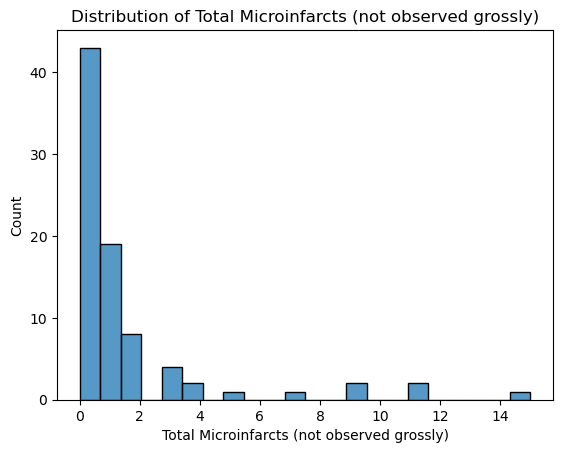

In [56]:
sns.histplot(donor_info_mod['Total Microinfarcts (not observed grossly)'])
plt.title('Distribution of Total Microinfarcts (not observed grossly)')
plt.show()

In [57]:
print('Skewness:', skew(donor_info_mod['Total Microinfarcts (not observed grossly)']))

Skewness: 2.899044997330181


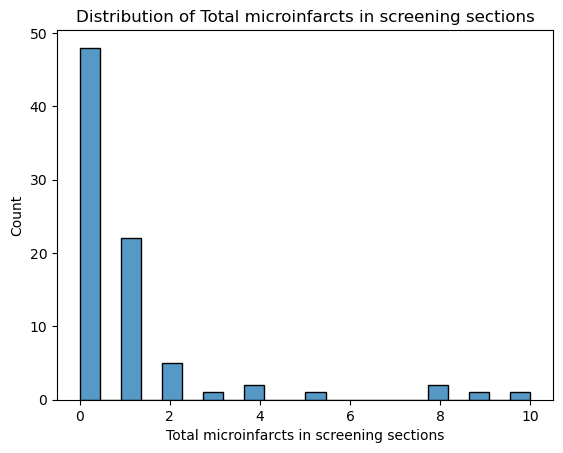

In [58]:
sns.histplot(donor_info_mod['Total microinfarcts in screening sections'])
plt.title('Distribution of Total microinfarcts in screening sections')
plt.show()

In [59]:
print('Skewness:', skew(donor_info_mod['Total microinfarcts in screening sections']))

Skewness: 2.9999595807270687


In [132]:
features_to_drop = ['Total Microinfarcts (not observed grossly)', 'Brain pH', 'Total microinfarcts in screening sections'] 

donor_info_final = donor_info_mod.drop(features_to_drop, axis=1)
donor_info_final.to_excel('donor_info.xlsx', index=False)
donor_info_final

,Donor ID,Age at Death Cat,Sex,Highest level of education,APOE4 Status,Cognitive Status,Fresh Brain Weight,Thal,Braak,CERAD score,Overall CAA Score,Highest Lewy Body Disease,Atherosclerosis,Arteriolosclerosis,LATE,Overall AD neuropathological Change,Fresh Brain Weight Numeric
0,H19.33.004,80-84,Female,Bachelors,N,No dementia,1035,Thal 0,Braak IV,Absent,Not identified,Not Identified (olfactory bulb not assessed),Mild,Moderate,Not Identified,Not AD,1035.0
1,H20.33.001,80-84,Male,Bachelors,N,No dementia,1338,Thal 2,Braak IV,Sparse,Not identified,Not Identified (olfactory bulb not assessed),Mild,Mild,LATE Stage 2,Low,1338.0
2,H20.33.002,90+,Female,High School,N,No dementia,1078,Thal 0,Braak IV,Absent,Not identified,Limbic (Transitional),Moderate,Moderate,LATE Stage 2,Not AD,1078.0
3,H20.33.004,85-89,Male,Trade School/ Tech School,Y,Dementia,1261,Thal 5,Braak V,Frequent,Moderate,Neocortical (Diffuse),Mild,Severe,LATE Stage 1,High,1261.0
4,H20.33.005,90+,Female,High School,N,No dementia,1003,Thal 3,Braak IV,Moderate,Moderate,Not Identified (olfactory bulb not assessed),Mild,Moderate,LATE Stage 1,Intermediate,1003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21.33.043,90+,Female,Bachelors,N,Dementia,1082,Thal 4,Braak II,Sparse,Not identified,Not Identified (olfactory bulb assessed),Moderate,Moderate,LATE Stage 1,Low,1082.0
80,H21.33.044,85-89,Female,Trade School/ Tech School,N,Dementia,1168,Thal 3,Braak VI,Frequent,Moderate,Not Identified (olfactory bulb not assessed),Mild,Severe,LATE Stage 1,Intermediate,1168.0
81,H21.33.045,90+,Female,High School,Y,Dementia,925,Thal 4,Braak VI,Frequent,Moderate,Limbic (Transitional),Moderate,Moderate,LATE Stage 3,High,925.0
82,H21.33.046,90+,Male,Professional,N,Dementia,1159,Thal 4,Braak V,Moderate,Moderate,Neocortical (Diffuse),Mild,Severe,LATE Stage 2,High,1159.0


## Reading in Luminex

**RIPA is short for:** RIPA Buffer Tissue extractions.
**GuHCl is short for:** GuHCl (Guanidine Hydrochloride) Buffer Tissue extractions

In [60]:
luminex = pd.read_excel("data/Luminex/sea-ad_cohort_mtg-tissue_extractions-luminex_data_MOD.xlsx")
luminex

,Donor ID,ABeta40 pg/ug (RIPA),ABeta42 pg/ug (RIPA),tTAU pg/ug (RIPA),pTAU pg/ug (RIPA),ABeta40 pg/ug (GuHCl),ABeta42 pg/ug (GuHCl),tTAU pg/ug (GuHCl),pTAU pg/ug (GuHCl)
0,H20.33.045,981.444000,142.778000,1122.432229,5.415789,2179.336000,1737.483712,27.065263,2.638947
1,H20.33.044,0.007088,0.245263,7005.543158,5.630526,0.203116,0.311579,109.728421,1.957895
2,H21.33.045,21.423158,53.878947,147.565263,11.489474,46.231579,954.656984,14.405263,1.678947
3,H20.33.046,25.295789,69.988421,283.436842,15.917895,46.929474,1103.876312,17.046316,2.871579
4,H20.33.014,0.526168,16.137895,258.624211,3.398947,1.675758,97.642105,83.395789,1.680000
...,...,...,...,...,...,...,...,...,...
79,H21.33.039,1.450526,76.226316,704.801053,4.146316,2.818947,182.274737,74.063158,2.188421
80,H21.33.040,0.065192,0.490526,894.136842,3.850526,0.071711,0.898947,141.738947,2.167368
81,H21.33.041,5.010526,88.169474,740.583158,3.327368,6.568421,340.077895,110.118947,1.825263
82,H21.33.042,20.538947,47.932632,531.651579,2.507368,51.310526,330.860000,129.435789,1.876842


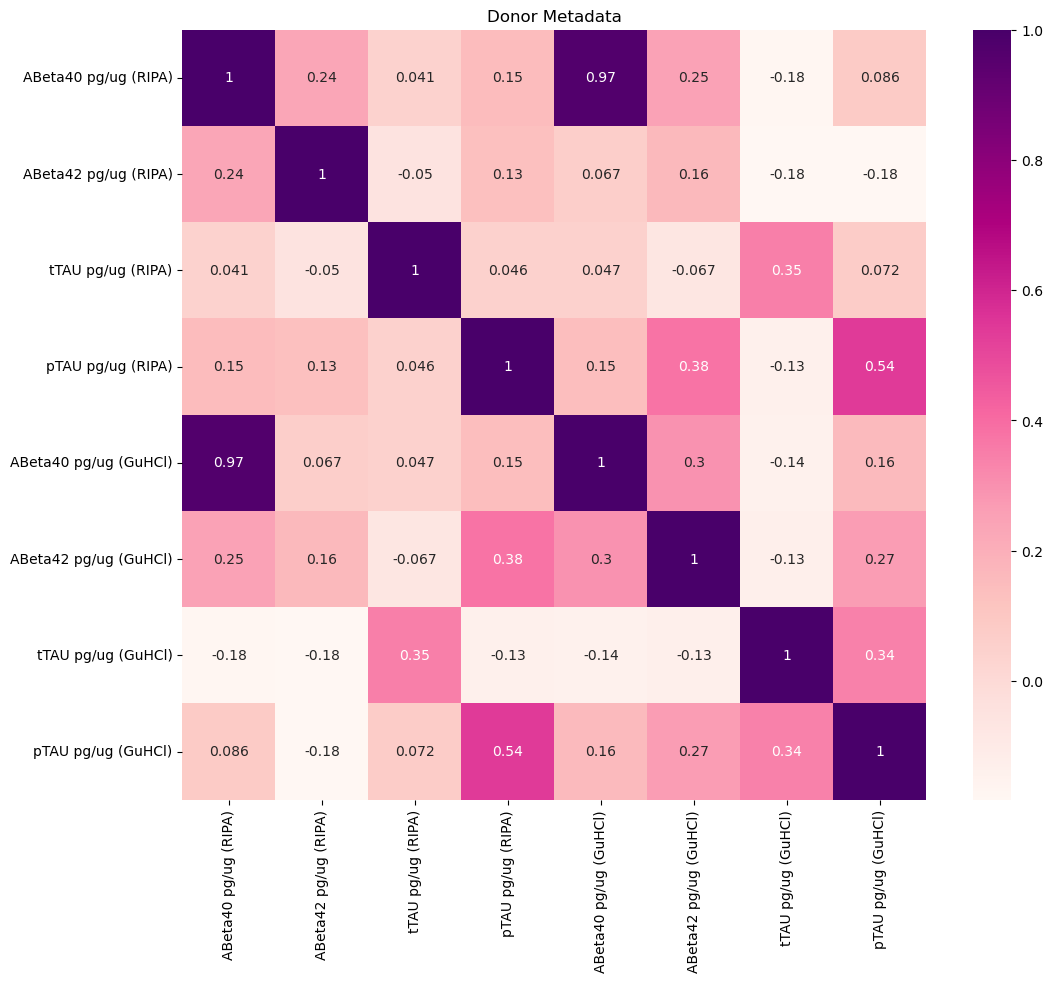

In [117]:
plt.figure(figsize=(12, 10)) 
corr = luminex.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdPu')
plt.title('Donor Metadata')
plt.show()

### Modifying Lumix Dataset to Match Donor IDs

In [134]:
donor_ids = donor_info_final['Donor ID']

luminex_final = luminex[luminex['Donor ID'].isin(donor_ids)]
luminex_final.to_excel('luminex.xlsx', index=False)
luminex_final

,Donor ID,ABeta40 pg/ug (RIPA),ABeta42 pg/ug (RIPA),tTAU pg/ug (RIPA),pTAU pg/ug (RIPA),ABeta40 pg/ug (GuHCl),ABeta42 pg/ug (GuHCl),tTAU pg/ug (GuHCl),pTAU pg/ug (GuHCl)
0,H20.33.045,981.444000,142.778000,1122.432229,5.415789,2179.336000,1737.483712,27.065263,2.638947
1,H20.33.044,0.007088,0.245263,7005.543158,5.630526,0.203116,0.311579,109.728421,1.957895
2,H21.33.045,21.423158,53.878947,147.565263,11.489474,46.231579,954.656984,14.405263,1.678947
3,H20.33.046,25.295789,69.988421,283.436842,15.917895,46.929474,1103.876312,17.046316,2.871579
4,H20.33.014,0.526168,16.137895,258.624211,3.398947,1.675758,97.642105,83.395789,1.680000
...,...,...,...,...,...,...,...,...,...
79,H21.33.039,1.450526,76.226316,704.801053,4.146316,2.818947,182.274737,74.063158,2.188421
80,H21.33.040,0.065192,0.490526,894.136842,3.850526,0.071711,0.898947,141.738947,2.167368
81,H21.33.041,5.010526,88.169474,740.583158,3.327368,6.568421,340.077895,110.118947,1.825263
82,H21.33.042,20.538947,47.932632,531.651579,2.507368,51.310526,330.860000,129.435789,1.876842


## Reading in Quantitative Neuropathology

In [128]:
quant_neuropath = pd.read_csv("data/Quantitative Neuropathology/sea-ad_all_mtg_quant_neuropath_bydonorid_081122.csv", index_col = 0)
quant_neuropath

,Donor ID,total AT8 positive area_Grey matter,total AT8 positive area_Layer1,total AT8 positive area_Layer2,total AT8 positive area_Layer3,total AT8 positive area_Layer4,total AT8 positive area_Layer5-6,total pTDP43 positive area_Grey matter,total pTDP43 positive area_Layer1,total pTDP43 positive area_Layer2,...,GFAP area analyzed_Layer4,GFAP area analyzed_Layer5-6,ripa abeta40_Grey matter,ripa abeta42_Grey matter,ripa tTau_Grey matter,ripa pTau_Grey matter,guhcl abeta40_Grey matter,guhcl abeta42_Grey matter,guhcl tTau_Grey matter,guhcl pTau_Grey matter
0,H20.33.045,3.877395e+06,643716.625000,280887.093800,1.254377e+06,345364.281300,1.353050e+06,0.000000,0.000000,0.000000,...,11055656.00,36171888,981.444000,142.778000,1122.432229,5.415789,2179.336000,1737.483712,27.065263,2.638947
1,H20.33.044,1.930647e+04,4761.578613,1835.943848,4.719058e+03,1448.979126,6.540912e+03,0.000000,0.000000,0.000000,...,6620353.00,33180848,0.007088,0.245263,7005.543158,5.630526,0.203116,0.311579,109.728421,1.957895
2,H21.33.045,6.336955e+06,793676.500000,860485.562500,2.017694e+06,514507.093800,2.150592e+06,32320.361940,2977.464600,12227.884770,...,8399442.00,36778840,21.423158,53.878947,147.565263,11.489474,46.231579,954.656984,14.405263,1.678947
3,H20.33.046,6.552073e+05,279479.625000,153697.968800,1.034985e+05,30003.353520,8.852787e+04,6033.681061,1180.770874,1268.076904,...,3844266.25,11699817,25.295789,69.988421,283.436842,15.917895,46.929474,1103.876312,17.046316,2.871579
4,H20.33.014,1.610181e+05,31380.876950,35770.085940,6.372464e+04,11346.017580,1.879647e+04,0.000000,0.000000,0.000000,...,5923990.50,13225602,0.526168,16.137895,258.624211,3.398947,1.675758,97.642105,83.395789,1.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21.33.039,2.168084e+06,229363.406300,343089.281300,8.755077e+05,144139.328100,5.759839e+05,45399.669430,9304.514648,7272.571777,...,4435225.50,18118974,1.450526,76.226316,704.801053,4.146316,2.818947,182.274737,74.063158,2.188421
80,H21.33.040,3.087407e+06,391799.281300,435721.281300,1.286870e+06,185862.328100,7.871542e+05,0.000000,0.000000,0.000000,...,7005611.50,34048696,5.010526,88.169474,740.583158,3.327368,6.568421,340.077895,110.118947,1.825263
81,H21.33.041,5.216760e+05,44282.300780,70100.750000,3.186330e+05,19372.138670,6.928782e+04,0.000000,0.000000,0.000000,...,5955820.50,22808794,0.065192,0.490526,894.136842,3.850526,0.071711,0.898947,141.738947,2.167368
82,H21.33.042,3.841064e+06,111307.210900,410594.500000,1.387570e+06,311343.562500,1.620248e+06,0.000000,0.000000,0.000000,...,8130220.50,36212492,20.538947,47.932632,531.651579,2.507368,51.310526,330.860000,129.435789,1.876842


In [129]:
quant_neuropath.columns

Index(['Donor ID', 'total AT8 positive area_Grey matter',
       'total AT8 positive area_Layer1', 'total AT8 positive area_Layer2',
       'total AT8 positive area_Layer3', 'total AT8 positive area_Layer4',
       'total AT8 positive area_Layer5-6',
       'total pTDP43 positive area_Grey matter',
       'total pTDP43 positive area_Layer1',
       'total pTDP43 positive area_Layer2',
       ...
       'GFAP area analyzed_Layer4', 'GFAP area analyzed_Layer5-6',
       'ripa abeta40_Grey matter', 'ripa abeta42_Grey matter',
       'ripa tTau_Grey matter', 'ripa pTau_Grey matter',
       'guhcl abeta40_Grey matter', 'guhcl abeta42_Grey matter',
       'guhcl tTau_Grey matter', 'guhcl pTau_Grey matter'],
      dtype='object', length=393)

In [130]:
missing_percent = quant_neuropath.isnull().sum() * 100 / len(quant_neuropath)
missing_percent = missing_percent[missing_percent > 1]

missing_percent_sorted = missing_percent.sort_values(ascending=False)

print(missing_percent_sorted.head(60))

Series([], dtype: float64)


### Modifying Quantitative Neuropathology Dataset to Match Donor IDs

In [133]:
donor_ids = donor_info_final['Donor ID']

quant_neuropath_final = quant_neuropath[quant_neuropath['Donor ID'].isin(donor_ids)]
quant_neuropath_final.to_excel('quant_neuropath.xlsx', index=False)
quant_neuropath_final

,Donor ID,total AT8 positive area_Grey matter,total AT8 positive area_Layer1,total AT8 positive area_Layer2,total AT8 positive area_Layer3,total AT8 positive area_Layer4,total AT8 positive area_Layer5-6,total pTDP43 positive area_Grey matter,total pTDP43 positive area_Layer1,total pTDP43 positive area_Layer2,...,GFAP area analyzed_Layer4,GFAP area analyzed_Layer5-6,ripa abeta40_Grey matter,ripa abeta42_Grey matter,ripa tTau_Grey matter,ripa pTau_Grey matter,guhcl abeta40_Grey matter,guhcl abeta42_Grey matter,guhcl tTau_Grey matter,guhcl pTau_Grey matter
0,H20.33.045,3.877395e+06,643716.625000,280887.093800,1.254377e+06,345364.281300,1.353050e+06,0.000000,0.000000,0.000000,...,11055656.00,36171888,981.444000,142.778000,1122.432229,5.415789,2179.336000,1737.483712,27.065263,2.638947
1,H20.33.044,1.930647e+04,4761.578613,1835.943848,4.719058e+03,1448.979126,6.540912e+03,0.000000,0.000000,0.000000,...,6620353.00,33180848,0.007088,0.245263,7005.543158,5.630526,0.203116,0.311579,109.728421,1.957895
2,H21.33.045,6.336955e+06,793676.500000,860485.562500,2.017694e+06,514507.093800,2.150592e+06,32320.361940,2977.464600,12227.884770,...,8399442.00,36778840,21.423158,53.878947,147.565263,11.489474,46.231579,954.656984,14.405263,1.678947
3,H20.33.046,6.552073e+05,279479.625000,153697.968800,1.034985e+05,30003.353520,8.852787e+04,6033.681061,1180.770874,1268.076904,...,3844266.25,11699817,25.295789,69.988421,283.436842,15.917895,46.929474,1103.876312,17.046316,2.871579
4,H20.33.014,1.610181e+05,31380.876950,35770.085940,6.372464e+04,11346.017580,1.879647e+04,0.000000,0.000000,0.000000,...,5923990.50,13225602,0.526168,16.137895,258.624211,3.398947,1.675758,97.642105,83.395789,1.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21.33.039,2.168084e+06,229363.406300,343089.281300,8.755077e+05,144139.328100,5.759839e+05,45399.669430,9304.514648,7272.571777,...,4435225.50,18118974,1.450526,76.226316,704.801053,4.146316,2.818947,182.274737,74.063158,2.188421
80,H21.33.040,3.087407e+06,391799.281300,435721.281300,1.286870e+06,185862.328100,7.871542e+05,0.000000,0.000000,0.000000,...,7005611.50,34048696,5.010526,88.169474,740.583158,3.327368,6.568421,340.077895,110.118947,1.825263
81,H21.33.041,5.216760e+05,44282.300780,70100.750000,3.186330e+05,19372.138670,6.928782e+04,0.000000,0.000000,0.000000,...,5955820.50,22808794,0.065192,0.490526,894.136842,3.850526,0.071711,0.898947,141.738947,2.167368
82,H21.33.042,3.841064e+06,111307.210900,410594.500000,1.387570e+06,311343.562500,1.620248e+06,0.000000,0.000000,0.000000,...,8130220.50,36212492,20.538947,47.932632,531.651579,2.507368,51.310526,330.860000,129.435789,1.876842


## Merging All Datasets

In [135]:
merged_df = donor_info_mod.merge(luminex, on='Donor ID')
merged_df = merged_df.merge(quant_neuropath, on='Donor ID')
merged_df.to_excel('merged_data.xlsx', index=False)
merged_df

,Donor ID,Age at Death Cat,Sex,Highest level of education,APOE4 Status,Cognitive Status,Brain pH,Fresh Brain Weight,Thal,Braak,...,GFAP area analyzed_Layer4,GFAP area analyzed_Layer5-6,ripa abeta40_Grey matter,ripa abeta42_Grey matter,ripa tTau_Grey matter,ripa pTau_Grey matter,guhcl abeta40_Grey matter,guhcl abeta42_Grey matter,guhcl tTau_Grey matter,guhcl pTau_Grey matter
0,H19.33.004,80-84,Female,Bachelors,N,No dementia,7.0,1035,Thal 0,Braak IV,...,5149101.50,24960854,0.019621,0.971579,1552.414737,1.901053,1.409474,9.487368,93.387368,1.493684
1,H20.33.001,80-84,Male,Bachelors,N,No dementia,6.8,1338,Thal 2,Braak IV,...,10035712.00,39595568,0.215789,2.744211,756.090526,2.737895,1.015616,7.822105,76.413684,1.580000
2,H20.33.002,90+,Female,High School,N,No dementia,7.3,1078,Thal 0,Braak IV,...,7088817.00,24013120,0.000598,0.147158,313.525263,2.615789,0.100708,0.610526,31.521053,1.068421
3,H20.33.004,85-89,Male,Trade School/ Tech School,Y,Dementia,6.7,1261,Thal 5,Braak V,...,9473856.00,14944554,60.766316,80.266316,318.528421,7.412632,91.172000,226.900000,44.423158,2.397895
4,H20.33.005,90+,Female,High School,N,No dementia,6.8,1003,Thal 3,Braak IV,...,4675924.00,24942594,5.136842,16.156842,107.348421,1.327368,28.778000,121.266000,10.516842,0.545263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,H21.33.043,90+,Female,Bachelors,N,Dementia,6.6,1082,Thal 4,Braak II,...,9706169.00,38430856,1.593684,29.892632,611.000000,4.404211,3.465263,114.392632,48.078947,2.775789
79,H21.33.044,85-89,Female,Trade School/ Tech School,N,Dementia,6.6,1168,Thal 3,Braak VI,...,9958693.00,41765288,7.130526,33.637895,417.894737,3.662105,10.273684,111.835790,59.477895,1.818947
80,H21.33.045,90+,Female,High School,Y,Dementia,7.2,925,Thal 4,Braak VI,...,8399442.00,36778840,21.423158,53.878947,147.565263,11.489474,46.231579,954.656984,14.405263,1.678947
81,H21.33.046,90+,Male,Professional,N,Dementia,6.4,1159,Thal 4,Braak V,...,3684067.25,16472456,2.421053,19.195789,1124.777383,3.129474,26.908000,1694.563486,262.382105,1.815789


In [123]:
missing_percent = merged_df.isnull().sum() * 100 / len(mri)
missing_percent = missing_percent[missing_percent > 0]

missing_percent_sorted = missing_percent.sort_values(ascending=False)

print(missing_percent_sorted.head(100))

Series([], dtype: float64)


In [ ]:
corr = merged_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, cmap='PuRd', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [125]:
(merged_df.groupby(['Cognitive Status', 'Sex']).agg({'Brain pH': ['mean', 'count', 'median']}))

Brain pH             
                             mean count median
Cognitive Status Sex                          
Dementia         Female  6.600000    26    6.6
                 Male    6.640000    15    6.7
No dementia      Female  6.654167    24    6.7
                 Male    6.866667    18    6.8